In [1]:
from TMSAnalysis.StruckAnalysisConfiguration import StruckAnalysisConfiguration
from TMSAnalysis.TMSUtilities.GetCuts import Cut
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import uproot, glob, time
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['font.size'] = 12

In [2]:
path_to_reduced = '/p/lustre1/jacopod/31th/'
!ls $path_to_reduced

20201023_DS04_BkgData_1200ADCThreshold	20201101_DS22_Xe127Data
20201024_DS06_Xe127Data			20201102_DS23_NoiseData
20201025_DS08_Xe127Data			20201102_DS24_Rn220Data
20201026_DS09_Xe127Data			20201103_DS25_Run220Data
20201026_DS10_Xe127Data			20201103_DS26_Run220Data
20201027_DS12_Xe127Data			20201104_DS27_Run220Data
20201030_DS15_Xe127Data			20201105_DS28_Rn220Data
20201031_DS16_Xe127Data			20201106_DS29_Rn220Data
20201031_DS17_Xe127Data			20201107_DS30_Rn220Data
20201031_DS18_Xe127Data			config


In [10]:
folder = '20201104_DS27_Run220Data/analysis_500ns'
analysis_config = StruckAnalysisConfiguration.StruckAnalysisConfiguration()
analysis_config.GetRunParametersFromFile('/g/g90/jacopod/software/TMSAnalysis/config/31th/Run_Parameters_Run30.xlsx',\
                                         folder.split('/')[0])
sampling_time = analysis_config.run_parameters['Sampling Period [ns]']/1.e3
trigger_time = analysis_config.run_parameters['Pretrigger Length [samples]']
df = pd.read_pickle(path_to_reduced + folder + '/reduced_added.p')
for k in df.keys():
    print(k)

ChannelPositions
ChannelTypes
Cluster Drift Time
Cluster Energies
Cluster X-Pos
Cluster Y-Pos
Cluster Z-Pos
Event
File
IsFull3D
NumSiPMChannelsHit
NumTileChannelsHit
NumXTileChannelsHit
NumYTileChannelsHit
Number3DClusters
NumberOfClusters
SiPM 1-1 Baseline
SiPM 1-1 Baseline RMS
SiPM 1-1 Induced Charge
SiPM 1-1 Pulse Area
SiPM 1-1 Pulse Height
SiPM 1-1 Pulse Time
SiPM 1-1 T10
SiPM 1-1 T20
SiPM 1-1 T5
SiPM 1-1 T80
SiPM 1-1 T90
SiPM 1-3 Baseline
SiPM 1-3 Baseline RMS
SiPM 1-3 Induced Charge
SiPM 1-3 Pulse Area
SiPM 1-3 Pulse Height
SiPM 1-3 Pulse Time
SiPM 1-3 T10
SiPM 1-3 T20
SiPM 1-3 T5
SiPM 1-3 T80
SiPM 1-3 T90
SiPM 1-4 Baseline
SiPM 1-4 Baseline RMS
SiPM 1-4 Induced Charge
SiPM 1-4 Pulse Area
SiPM 1-4 Pulse Height
SiPM 1-4 Pulse Time
SiPM 1-4 T10
SiPM 1-4 T20
SiPM 1-4 T5
SiPM 1-4 T80
SiPM 1-4 T90
SiPM 2-1 Baseline
SiPM 2-1 Baseline RMS
SiPM 2-1 Induced Charge
SiPM 2-1 Pulse Area
SiPM 2-1 Pulse Height
SiPM 2-1 Pulse Time
SiPM 2-1 T10
SiPM 2-1 T20
SiPM 2-1 T5
SiPM 2-1 T80
SiPM 2-1 T90


In [11]:
def fit_function(x, A, beta, B, mu, sigma):
    return (A * np.exp(-x/beta) +\
            B * np.exp(-1.0 * (x - mu)**2 / (2 * sigma**2)))
def exp_function(x, A, beta):
    return(A * np.exp(-x/beta))

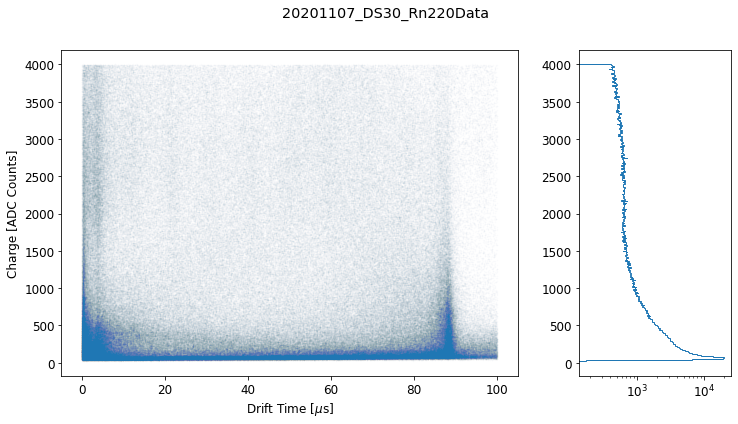

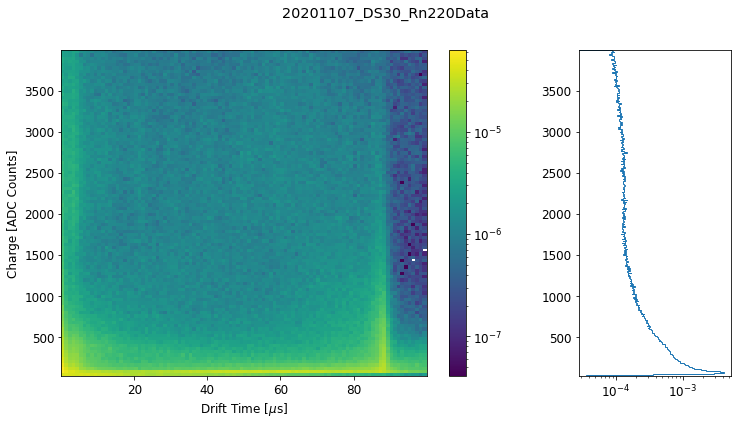

In [13]:
from matplotlib import gridspec
DriftTime = (df['TimeOfMaxChannel'] - trigger_time)*sampling_time
df['Purity-Corrected Charge Energy'] = df['TotalTileEnergy']*np.exp(DriftTime/55)
mask = (df['TotalTileEnergy']<4000) & (DriftTime<80) & (DriftTime>0)# & (df['TotalTileEnergy']>150)# & (df['NumberOfClusters']<3)
fig = plt.figure(figsize=(12, 6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1],sharey=ax0)
ax0.scatter(DriftTime[mask], df['TotalTileEnergy'][mask],s=1,alpha=0.01)
#ax0.plot(x,630*np.exp(-x/60),c='red')
#ax0.plot(x,630*375/203*np.exp(-x/60),c='magenta')
ax1.hist( df['TotalTileEnergy'][mask],orientation="horizontal",bins=500,histtype='step',log=True)
#plt.title(folder.split('/')[0])
ax0.set_xlabel('Drift Time [$\mu$s]')
ax0.set_ylabel('Charge [ADC Counts]')
fig.suptitle(folder.split('/')[0])
plt.show()
fig = plt.figure(figsize=(12, 6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1],sharey=ax0)
h_2d,x,y,im = ax0.hist2d(DriftTime[mask], df['TotalTileEnergy'][mask], bins=100, norm=LogNorm(),density=True)
#ax0.plot(x,630*np.exp(-x/60),c='red')
#ax0.plot(x,630*375/203*np.exp(-x/60),c='magenta')
h,b,_ = ax1.hist( df['TotalTileEnergy'][mask],orientation="horizontal",bins=500,histtype='step',log=True,density=True)
fig.colorbar(im,ax=ax0)
ax0.set_xlabel('Drift Time [$\mu$s]')
ax0.set_ylabel('Charge [ADC Counts]')
fig.suptitle(folder.split('/')[0])
plt.show()

In [20]:
folder = '20201023_DS04_BkgData_1200ADCThreshold/analysis_500ns'
df1 = pd.read_pickle(path_to_reduced + folder + '/reduced_added.p')
for k in df1.keys():
    print(k)

ChannelPositions
ChannelTypes
Cluster Drift Time
Cluster Energies
Cluster X-Pos
Cluster Y-Pos
Cluster Z-Pos
Event
File
IsFull3D
NumSiPMChannelsHit
NumTileChannelsHit
NumXTileChannelsHit
NumYTileChannelsHit
Number3DClusters
NumberOfClusters
SiPM 1-1 Baseline
SiPM 1-1 Baseline RMS
SiPM 1-1 Induced Charge
SiPM 1-1 Pulse Area
SiPM 1-1 Pulse Height
SiPM 1-1 Pulse Time
SiPM 1-1 T10
SiPM 1-1 T20
SiPM 1-1 T5
SiPM 1-1 T80
SiPM 1-1 T90
SiPM 1-3 Baseline
SiPM 1-3 Baseline RMS
SiPM 1-3 Induced Charge
SiPM 1-3 Pulse Area
SiPM 1-3 Pulse Height
SiPM 1-3 Pulse Time
SiPM 1-3 T10
SiPM 1-3 T20
SiPM 1-3 T5
SiPM 1-3 T80
SiPM 1-3 T90
SiPM 1-4 Baseline
SiPM 1-4 Baseline RMS
SiPM 1-4 Induced Charge
SiPM 1-4 Pulse Area
SiPM 1-4 Pulse Height
SiPM 1-4 Pulse Time
SiPM 1-4 T10
SiPM 1-4 T20
SiPM 1-4 T5
SiPM 1-4 T80
SiPM 1-4 T90
SiPM 2-1 Baseline
SiPM 2-1 Baseline RMS
SiPM 2-1 Induced Charge
SiPM 2-1 Pulse Area
SiPM 2-1 Pulse Height
SiPM 2-1 Pulse Time
SiPM 2-1 T10
SiPM 2-1 T20
SiPM 2-1 T5
SiPM 2-1 T80
SiPM 2-1 T90


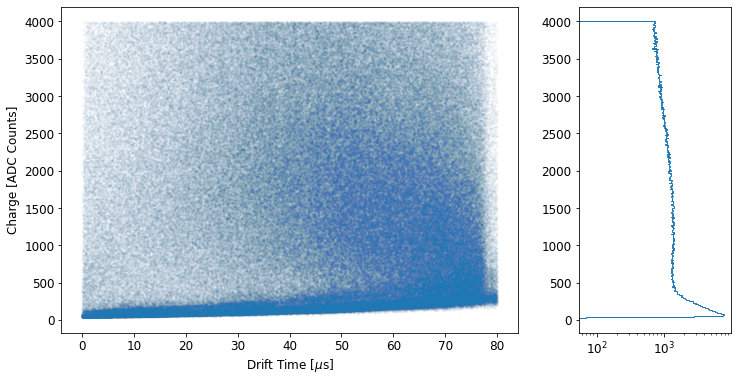

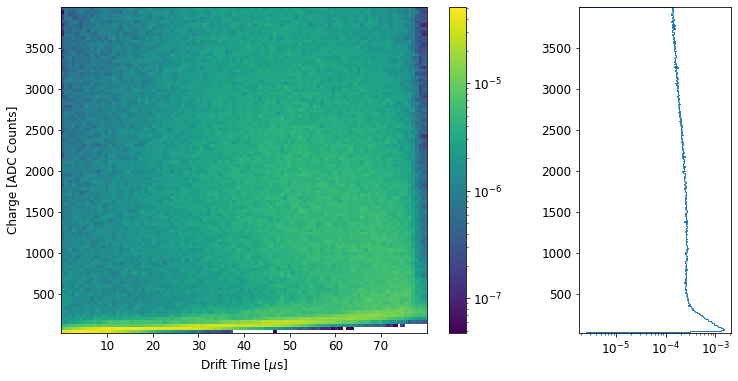

In [21]:
DriftTime1 = (df1['TimeOfMaxChannel'] - trigger_time)*sampling_time
df1['Purity-Corrected Charge Energy'] = df1['TotalTileEnergy']*np.exp(DriftTime1/55)
mask1 = (df1['Purity-Corrected Charge Energy']<4000) & (DriftTime1<80) & (DriftTime1>0)# & (df1['NumberOfClusters']<3)
fig = plt.figure(figsize=(12, 6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1],sharey=ax0)
ax0.scatter(DriftTime1[mask1], df1['Purity-Corrected Charge Energy'][mask1],s=2,alpha=0.02)
ax1.hist( df1['Purity-Corrected Charge Energy'][mask1],orientation="horizontal",bins=500,histtype='step',log=True)
#plt.title(folder.split('/')[0])
ax0.set_xlabel('Drift Time [$\mu$s]')
ax0.set_ylabel('Charge [ADC Counts]')
plt.show()
fig = plt.figure(figsize=(12, 6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1],sharey=ax0)
h1_2d,x,y,im = ax0.hist2d(DriftTime1[mask1], df1['Purity-Corrected Charge Energy'][mask1], bins=100, norm=LogNorm(),density=True)
h1,b1,_ = ax1.hist( df1['Purity-Corrected Charge Energy'][mask1],orientation="horizontal",bins=b,histtype='step',log=True,density=True)
fig.colorbar(im,ax=ax0)
ax0.set_xlabel('Drift Time [$\mu$s]')
ax0.set_ylabel('Charge [ADC Counts]')
#plt.title(folder.split('/')[0])
plt.show()

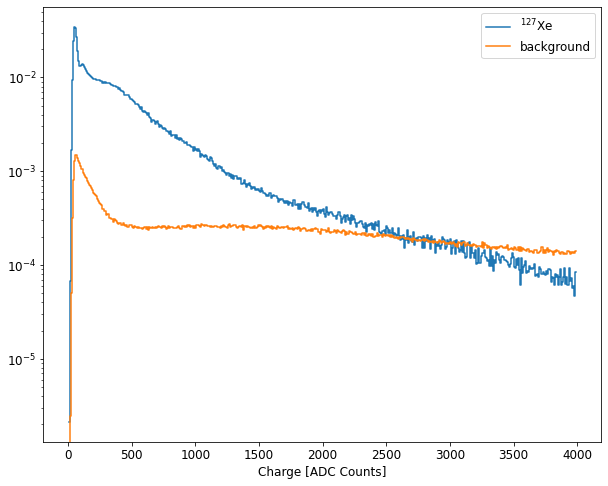

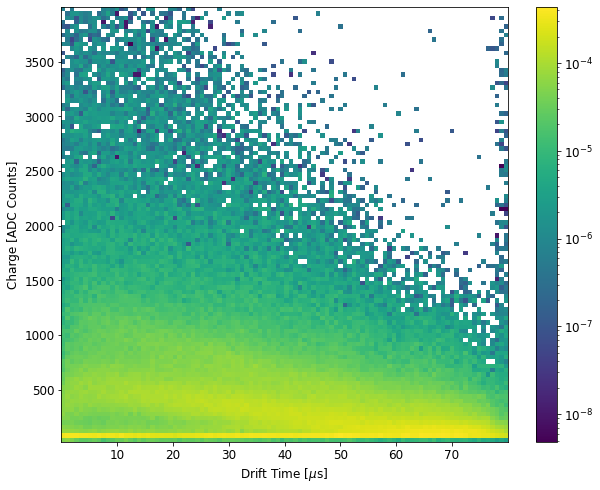

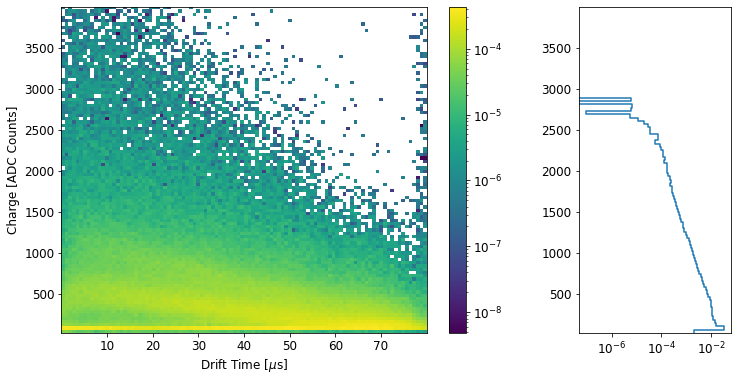

In [22]:
exposure_ratio = sum(h1[b1[:-1]>2000])/sum(h[b[:-1]>2000])
bn = np.sum((h_2d*exposure_ratio-h1_2d),axis=0)
plt.step(b[:-1],h*exposure_ratio,label='$^{127}$Xe')
plt.step(b1[:-1],h1,label='background')
plt.yscale('log')
plt.xlabel('Charge [ADC Counts]')
plt.legend()
plt.show()
im = plt.imshow((h_2d*exposure_ratio-h1_2d).T,origin='lower', norm=LogNorm(),aspect='auto', extent=[x[0],x[-1],y[0],y[-1]])

plt.colorbar(im)
plt.xlabel('Drift Time [$\mu$s]')
plt.ylabel('Charge [ADC Counts]')
plt.show
fig = plt.figure(figsize=(12, 6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1],sharey=ax0)
ax0.imshow((h_2d*exposure_ratio-h1_2d).T,origin='lower', norm=LogNorm(),aspect='auto', extent=[x[0],x[-1],y[0],y[-1]])
#ax1.hist( df1['Purity-Corrected Charge Energy'][mask1],orientation="horizontal",bins=b,histtype='step',log=True,density=True)
ax1.step(bn,y[:-1])
ax1.set_xscale('log')
fig.colorbar(im,ax=ax0)
ax0.set_xlabel('Drift Time [$\mu$s]')
ax0.set_ylabel('Charge [ADC Counts]')
#plt.title(folder.split('/')[0])
plt.show()

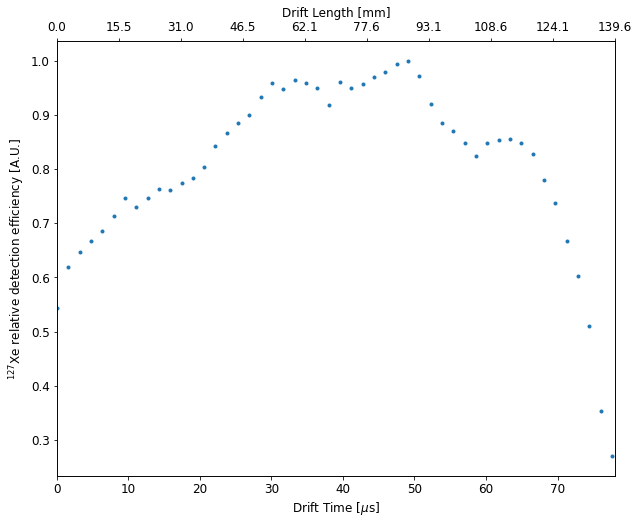

In [60]:
#print((h_2d*exposure_ratio-h1_2d)[:,1:40])
xe_count = np.sum(h_2d[:,1:40],axis=1)
h_diff,b_diff = np.histogram(x[:-1], bins=50, weights=xe_count)
plt.plot(b_diff[:-1],h_diff/max(h_diff),'.')
#plt.vlines(140/1.79,plt.gca().get_ylim()[0],plt.gca().get_ylim()[1],linestyles='dashed')
#plt.text(75,0.5,'Cathode')
plt.xlim([0,78])
plt.xlabel('Drift Time [$\mu$s]')
plt.ylabel('$^{127}$Xe relative detection efficiency [A.U.]')
xlim = plt.gca().get_xlim()
ax0 = plt.gca().twiny()
ax0.set_xticks(np.linspace(xlim[0],xlim[-1],10)*1.79)
ax0.set_xlabel('Drift Length [mm]')
plt.show()

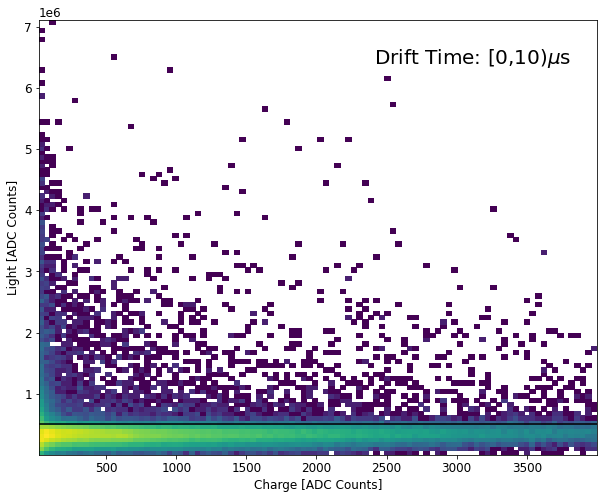

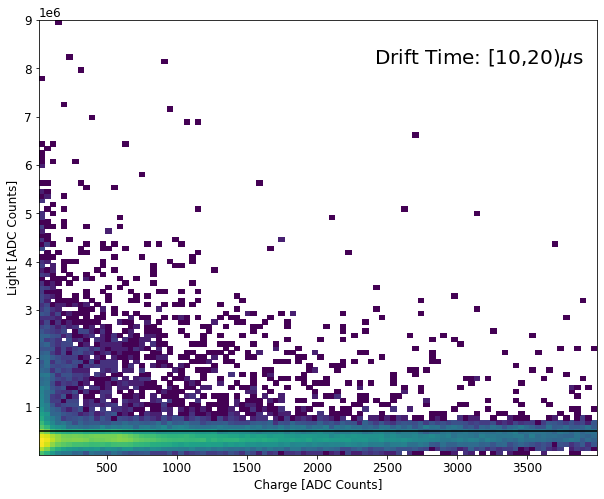

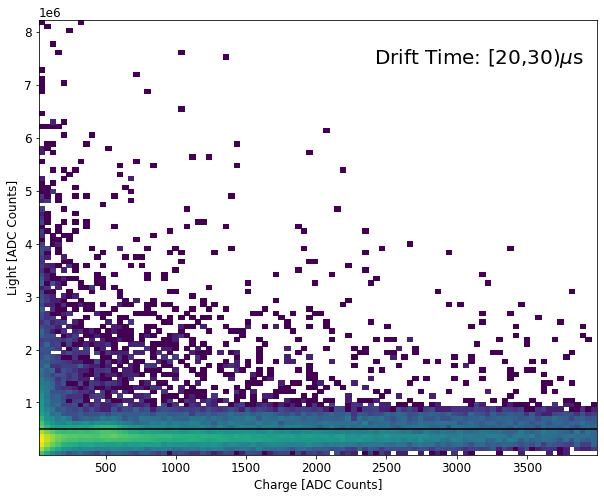

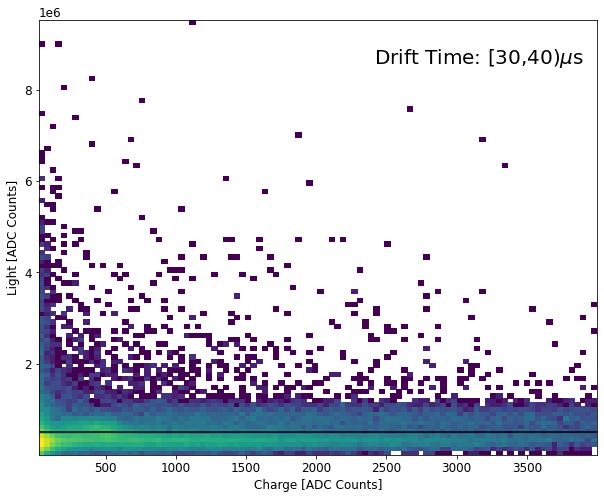

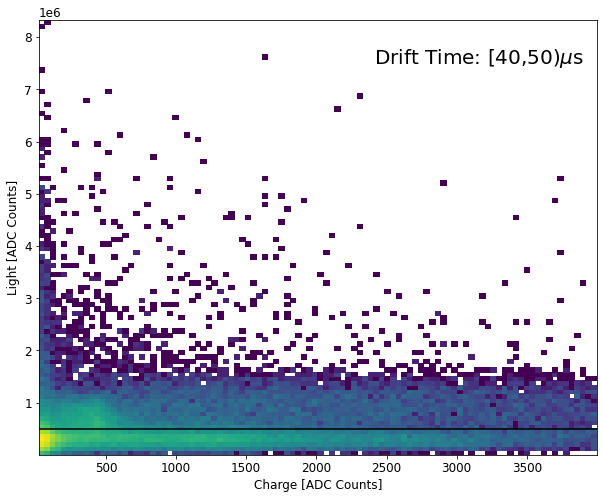

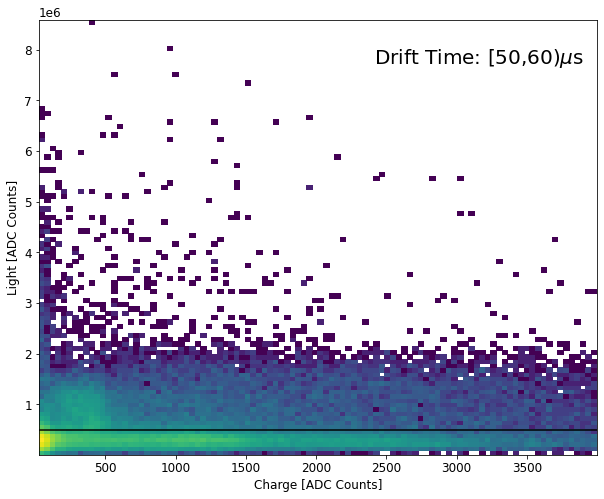

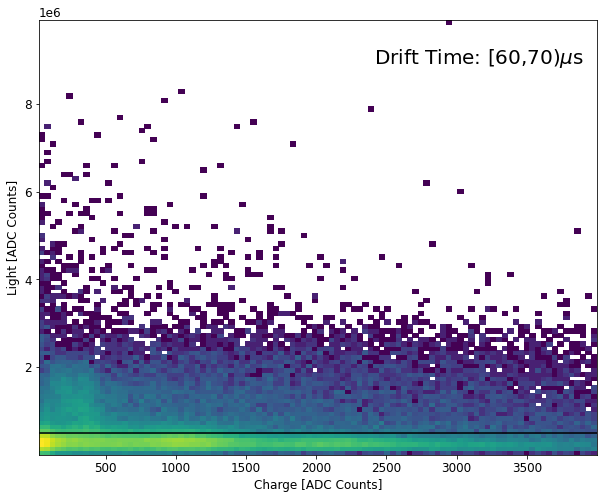

In [9]:
for i in range(7):
    mask1 = mask & (DriftTime>(i*10)) & (DriftTime<((i+1)*10)) & (df['TotalSiPMEnergy']<10000000)
    #plt.scatter(df['TotalTileEnergy'][mask1], df['TotalSiPMEnergy'][mask1],s=5,alpha=0.02)
    plt.hist2d(df['TotalTileEnergy'][mask1], df['TotalSiPMEnergy'][mask1], bins=100, norm=LogNorm())
    plt.text(0.6,0.9,'Drift Time: [{},{})$\mu$s'.format((i*10),(i+1)*10),\
             transform = plt.gca().transAxes,fontsize=20,bbox=dict(facecolor='white', edgecolor='none'))
    plt.xlabel('Charge [ADC Counts]')
    plt.ylabel('Light [ADC Counts]')
    plt.hlines(500000,plt.gca().get_xlim()[0],plt.gca().get_xlim()[1])
    plt.show()
df['Purity-Corrected Charge Energy'] = df['TotalTileEnergy']*np.exp(DriftTime/101.6)

Here I look how the events showing the 207Bi spectrum look like on each channel X13, X19 and Y17 are not active (recovered at the fifth run). No channel shows spectrum like features apart from the Compton edge in the big bundles. Since no clear peak is showing, this suggests that SS events become broader due to diffusion. Lastly as cross-check, I plot the total spectrum, summing up the energies from each channel

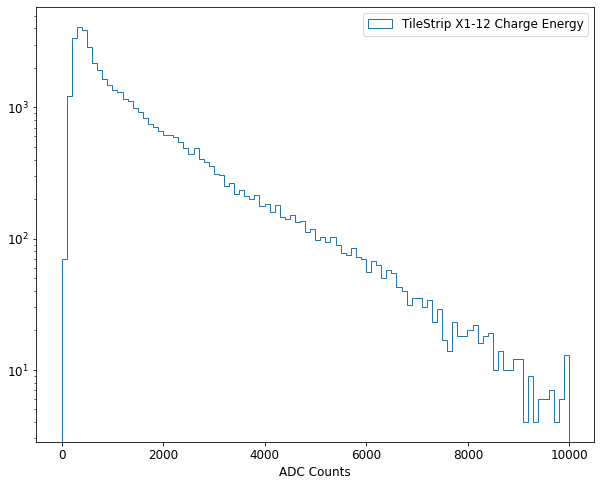

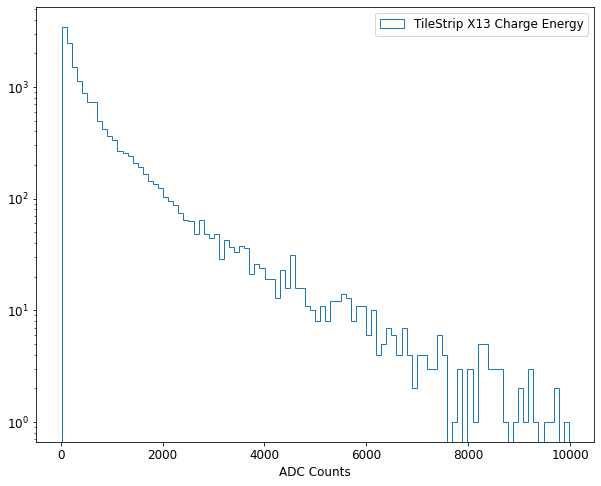

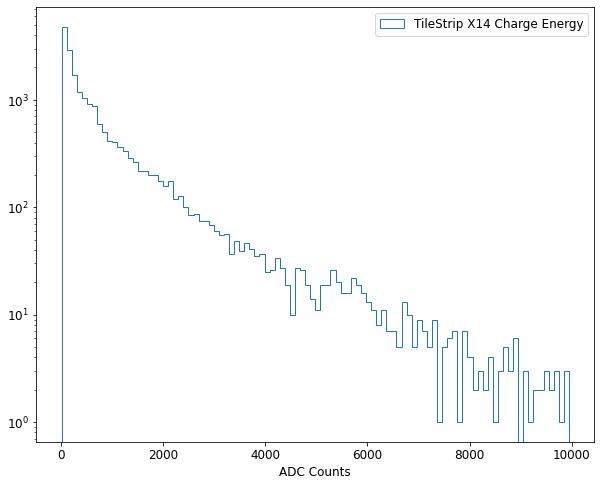

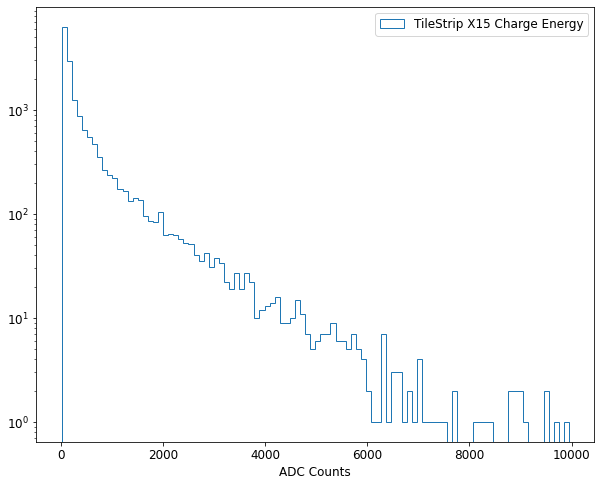

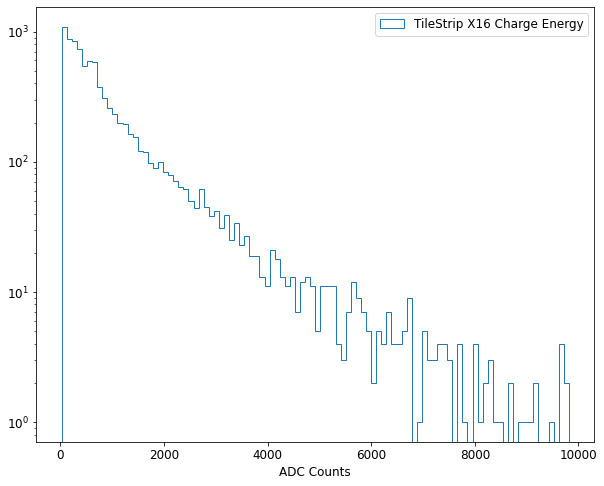

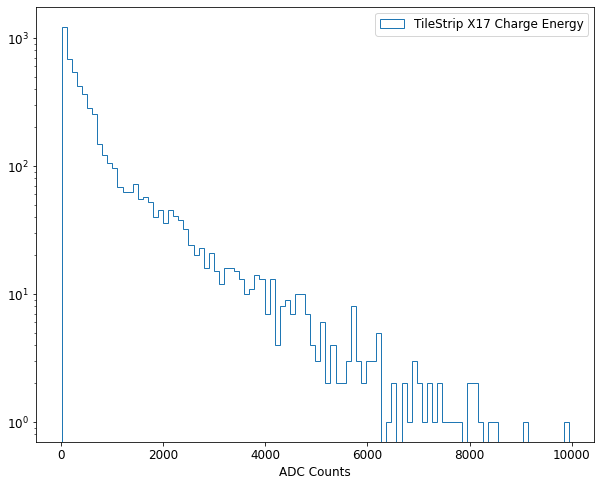

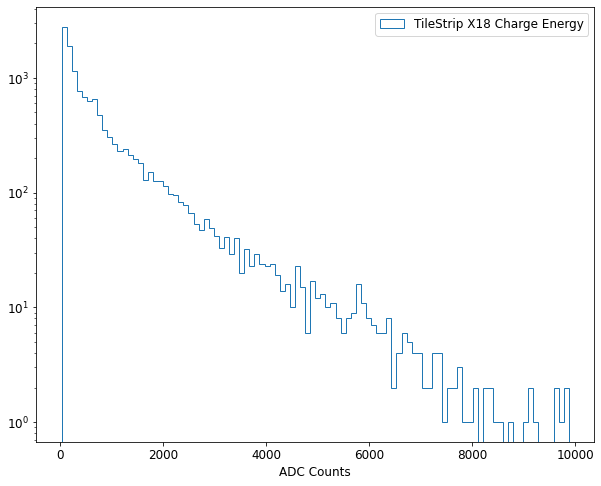

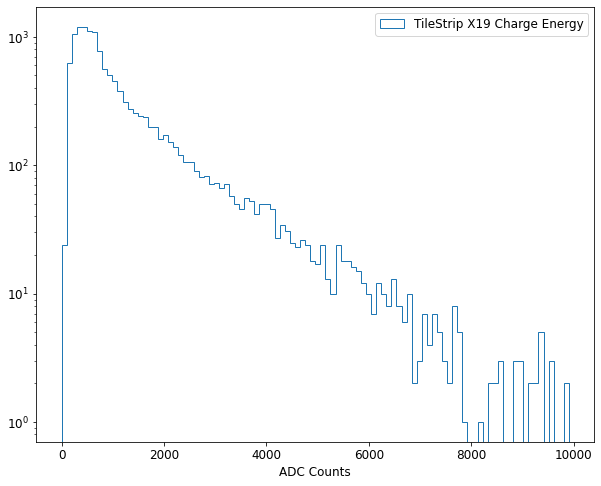

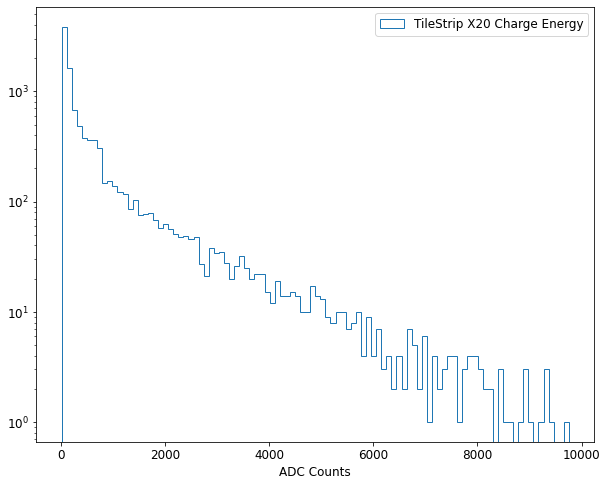

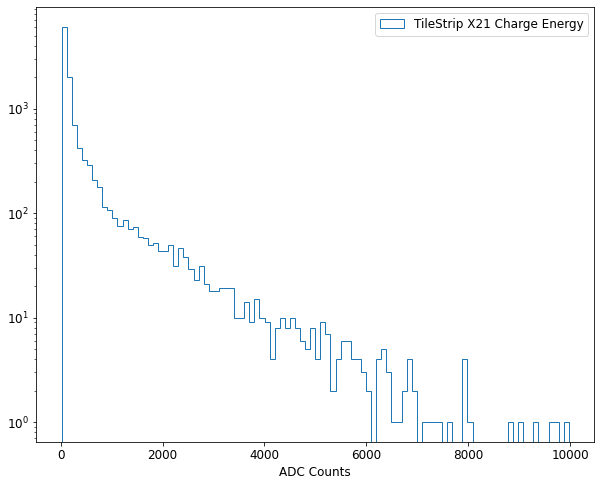

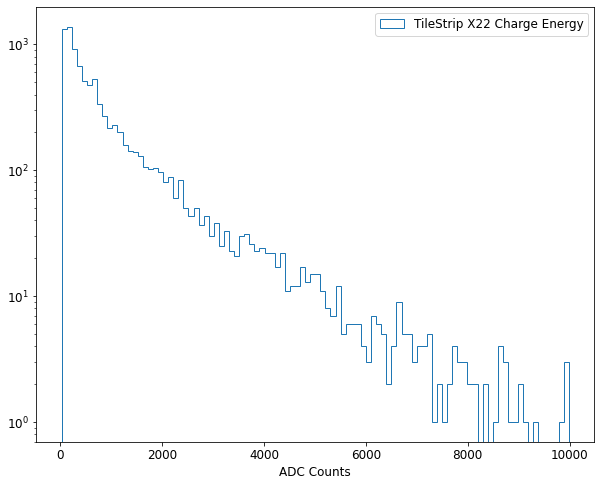

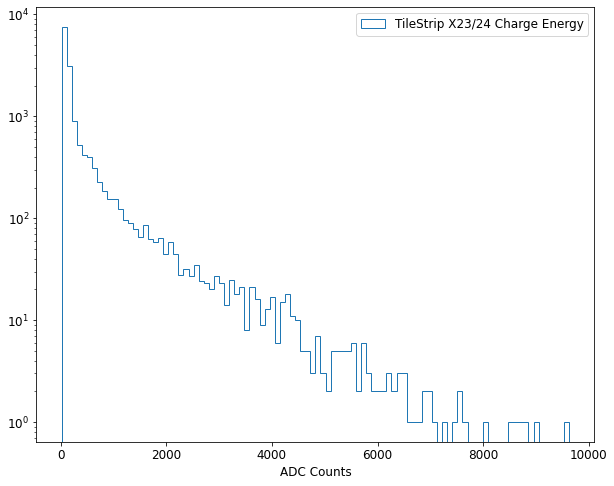

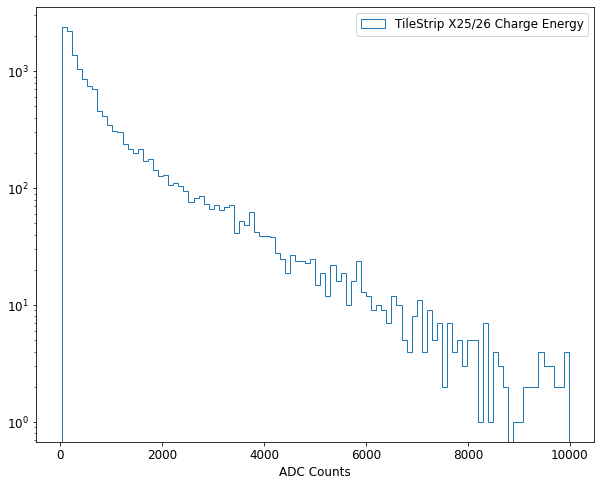

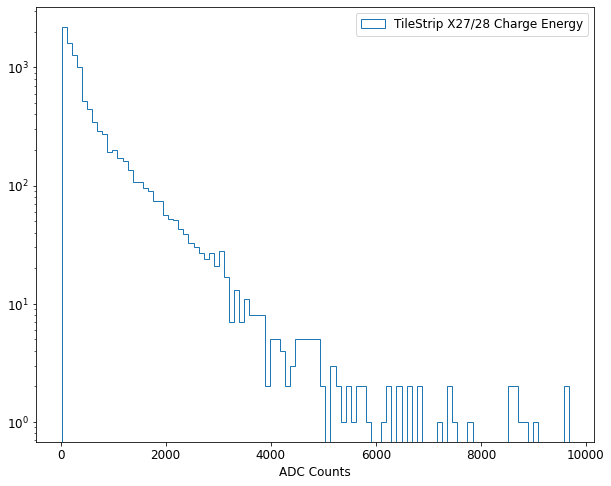

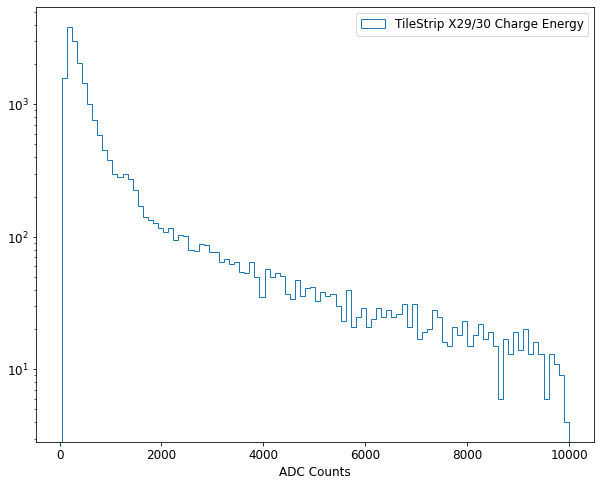

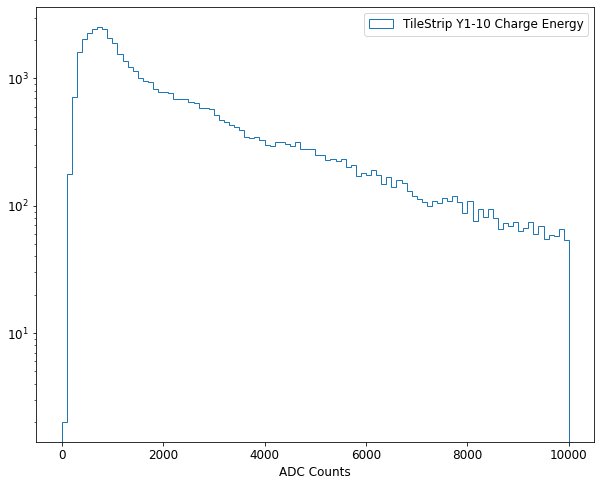

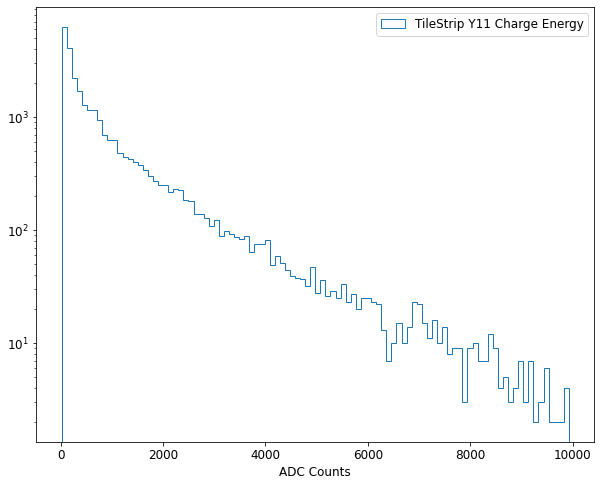

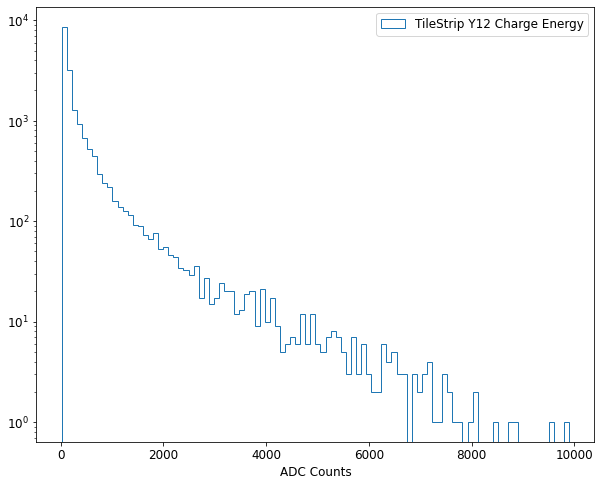

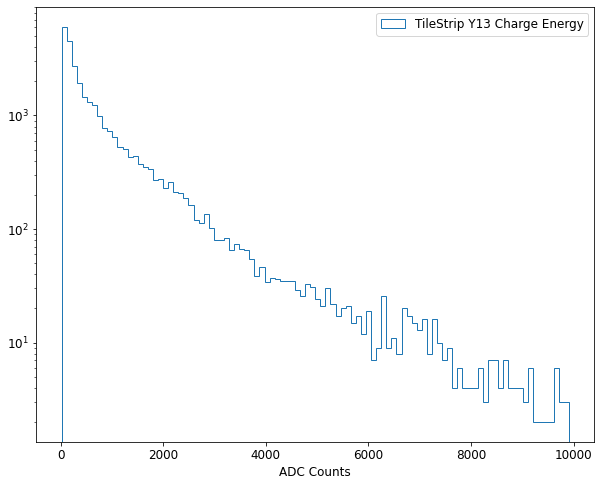

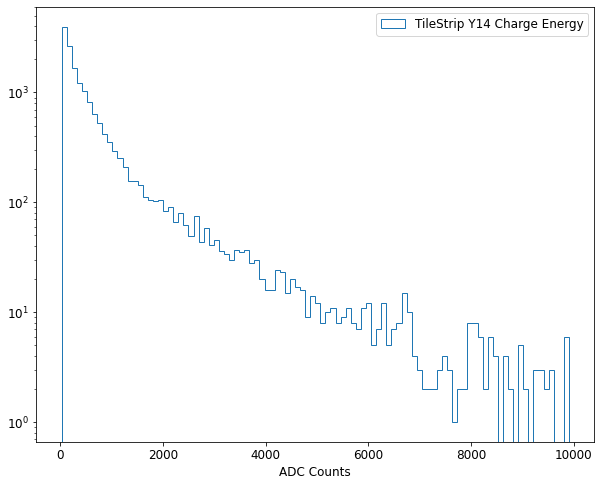

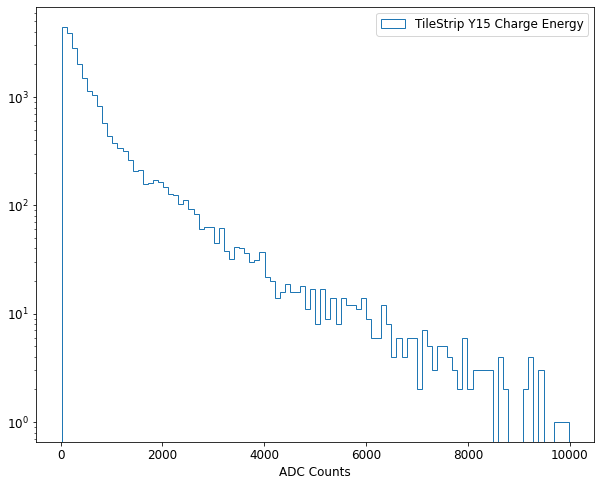

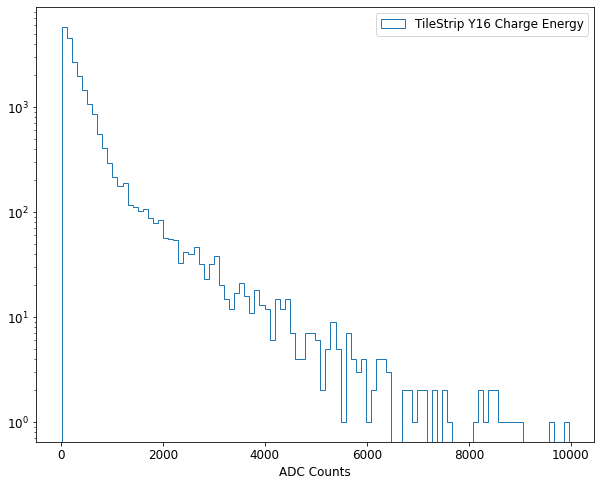

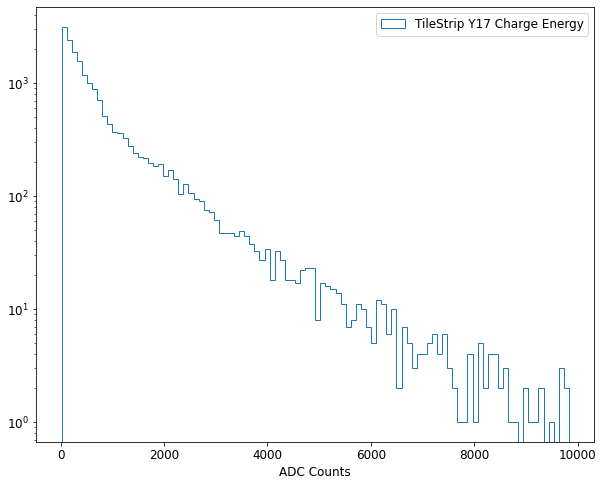

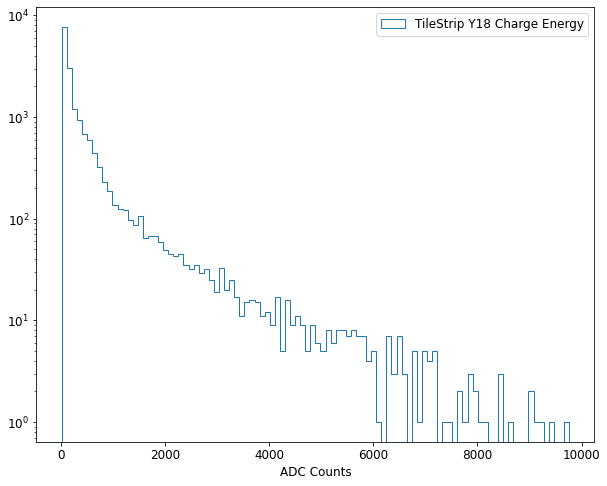

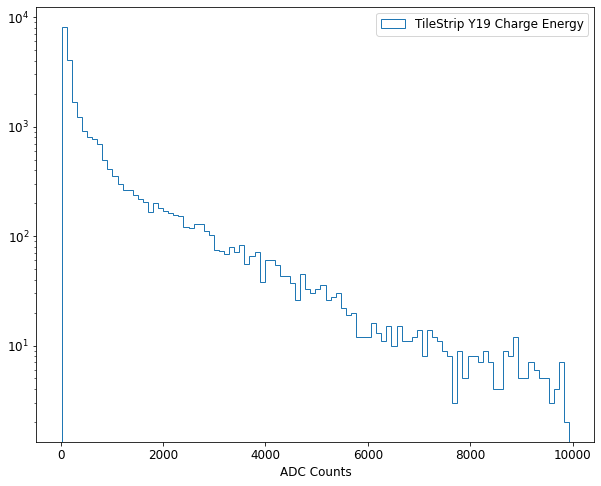

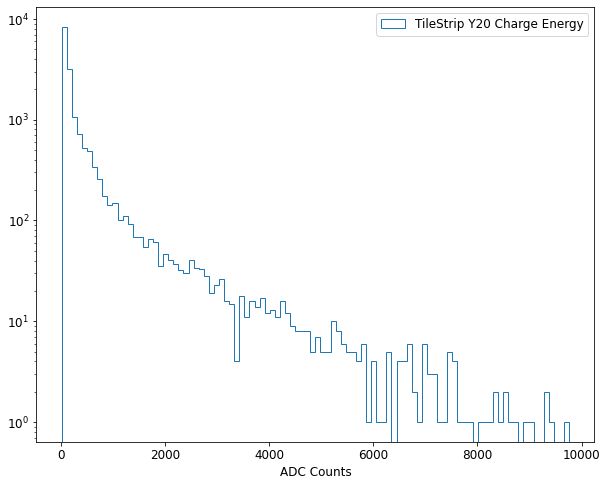

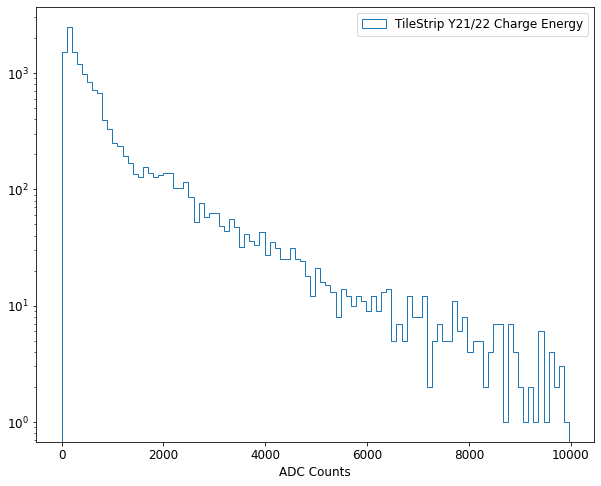

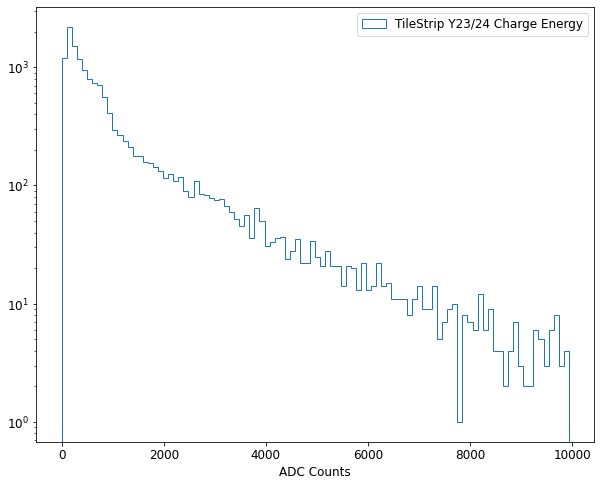

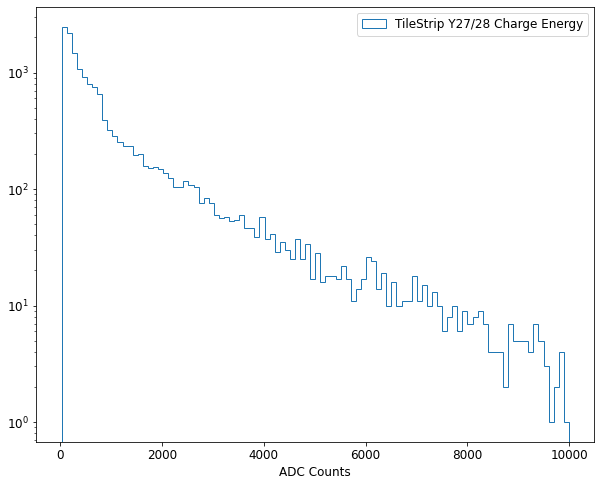

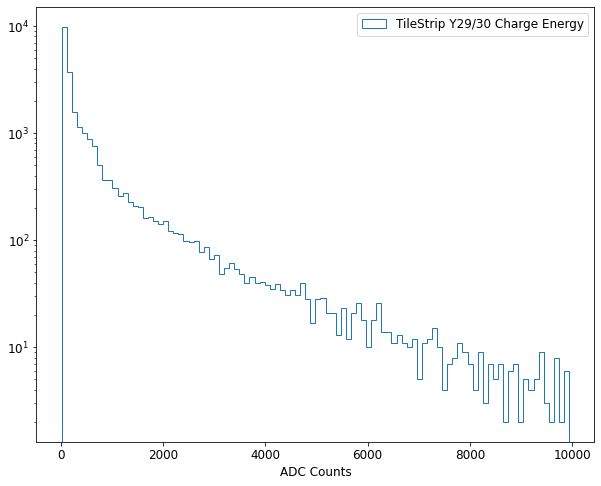

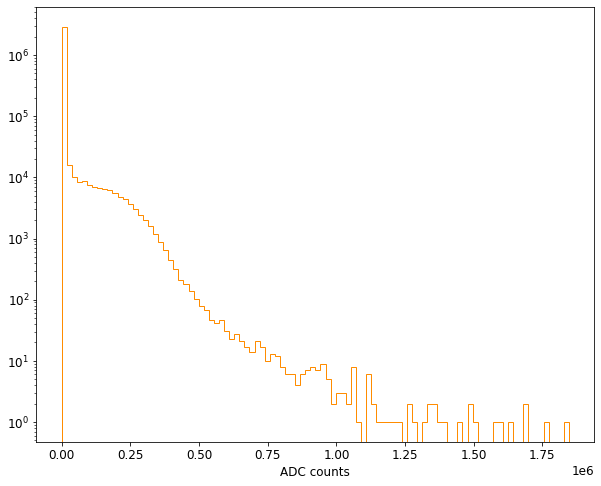

In [7]:
total_df = []
for k in df.keys():
    if not (k.startswith('TileStrip') and k.endswith('Charge Energy')):
        continue
    mask1 = (df[k]*np.exp(DriftTime/101.6)==df['Purity-Corrected Charge Energy']) &\
    (df['Purity-Corrected Charge Energy']<10000)
    #mask1 = DriftTime == DriftTime
    plt.hist(df[k][mask1]*np.exp(DriftTime[mask1]/101.6),bins=100,histtype='step',label=k,log=True)
    plt.legend()
    plt.xlabel('ADC Counts')
    plt.show()
    
plt.hist(df['Purity-Corrected Charge Energy'],bins=100,histtype='step',color='darkorange',log=True)
plt.xlabel('ADC counts')
plt.show()

here I bundle up channels (X and Y-wise) to have all approximately the same width (~10 strips per bundle). Still no clear peak in the different spectra. Bundles X23/X30 and Y21/30 are most likely the furthest from the source

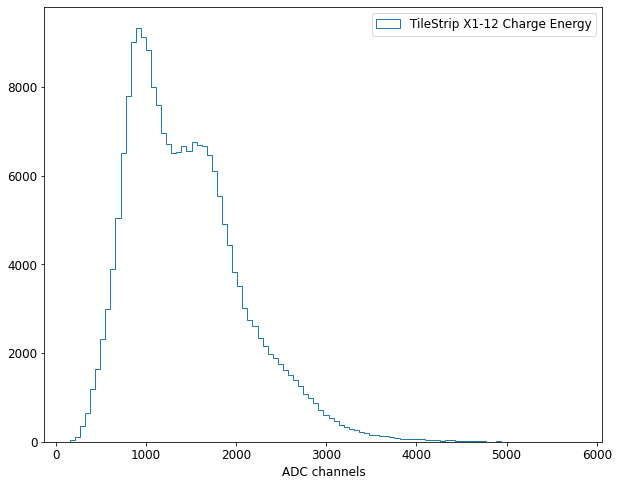

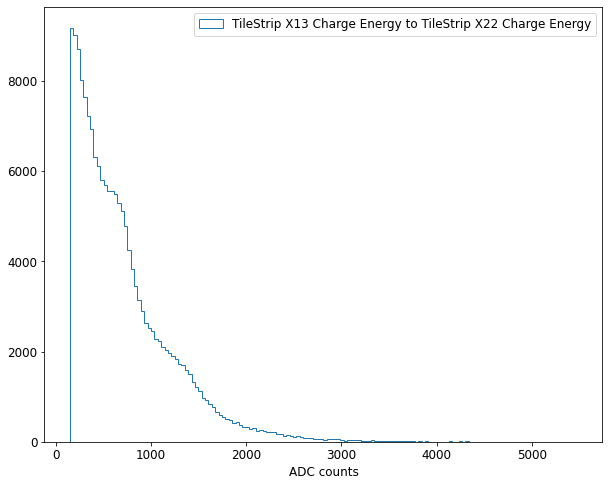

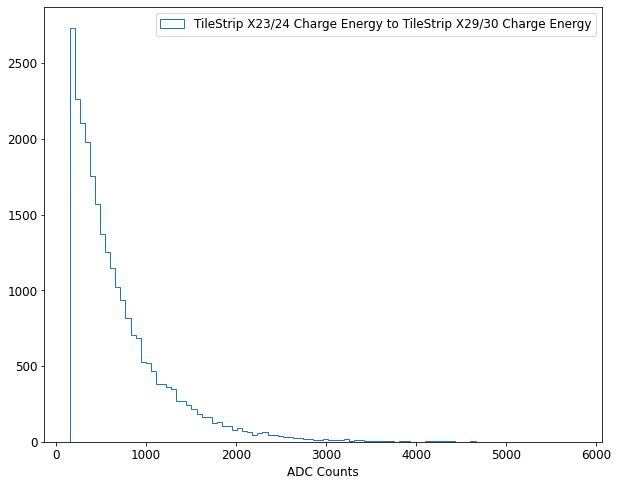

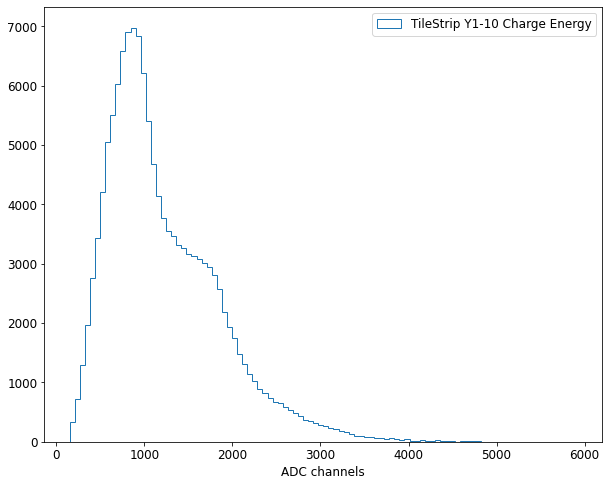

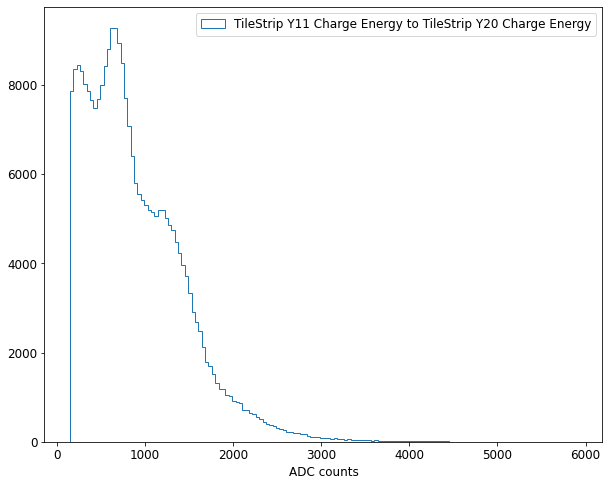

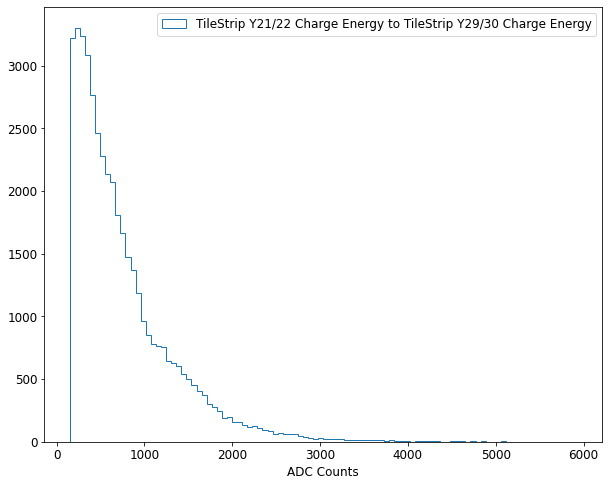

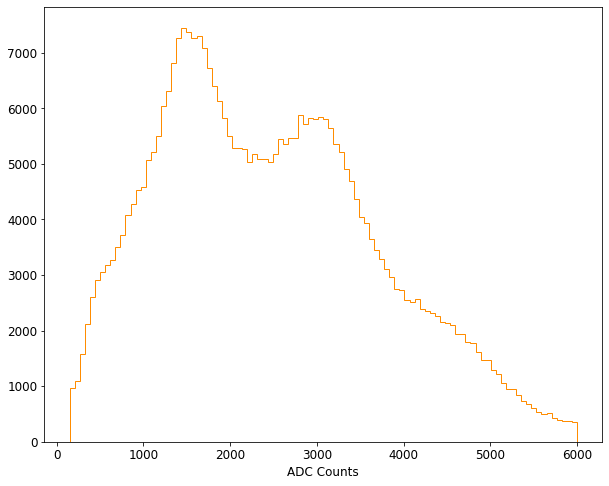

In [6]:
i = True
j = True
lower_threshold = 150
bundle = []
double_df = []
signle_df = []
 
for k in df.keys():
    if not (k.startswith('TileStrip') and k.endswith('Charge Energy')):
        continue
    
    if '-' in k:
        bundle_X = bundle
        bundle = df['{}'.format(k)].loc[mask]
        plt.hist(bundle[bundle>lower_threshold],bins=100,histtype='step',label=k)
        plt.legend()
        plt.xlabel('ADC channels')
        plt.show()
        
    elif '/' in k:     
        if i:
            first_label = k
            i = False    
            try:
                double_spectrum_X = double_spectrum
            except NameError:
                pass
            double_df = []

        double_df.append(df['{}'.format(k)].loc[mask])

        if k == 'TileStrip X29/30 Charge Energy' or k == 'TileStrip Y29/30 Charge Energy':
            i = True
            double_spectrum = np.sum(np.asarray(double_df),axis=0)
            plt.hist(double_spectrum[double_spectrum>lower_threshold],bins=100,histtype='step',\
                     label='{} to {}'.format(first_label,k))
            plt.legend()
            plt.xlabel('ADC Counts')
            plt.show()
        
    else:
        if j:
            first_label = k
            j = False
            try:
                signle_spectrum_X = signle_spectrum
            except NameError:
                pass
            signle_df = []

        signle_df.append(df['{}'.format(k)].loc[mask])
                
        if k == 'TileStrip X22 Charge Energy' or k == 'TileStrip Y20 Charge Energy':
            j = True
            signle_spectrum = np.sum(np.asarray(signle_df),axis=0)
            plt.hist(signle_spectrum[signle_spectrum>lower_threshold],bins=lower_threshold,histtype='step',\
                     label='{} to {}'.format(first_label,k))
            plt.legend()
            plt.xlabel('ADC counts')
            plt.show()

total_spectrum_bundle = pd.DataFrame(np.asarray([bundle_X.values, bundle.values,\
                                      signle_spectrum_X, signle_spectrum,\
                                      double_spectrum_X, double_spectrum]).T,\
                                    columns = ['10X','10Y','1X','1Y','2X','2Y'])
plt.hist(total_spectrum_bundle.sum(axis=1),bins=100,histtype='step',\
        color='darkorange')
plt.xlabel('ADC Counts')
plt.show()

Spectra are shown for the different XY combination of 10 ganged strips (the inset displays where the pixel is located in tile), the 570keV peak starts to appear, the 1067keV is still not contained in this area size. When a bigger bundle (20x20) is shown full spectrum appears distintively. The source is most likely located in 10X,1Y close to 10X,10Y and 1X,1Y

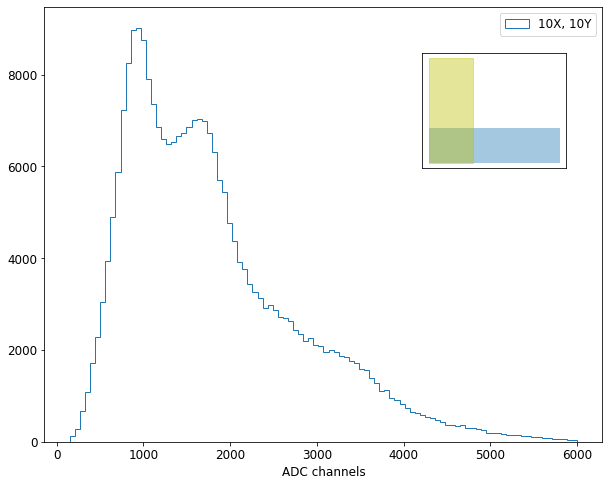

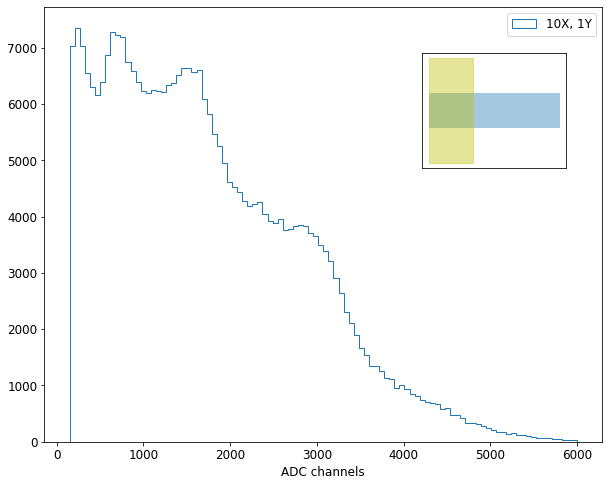

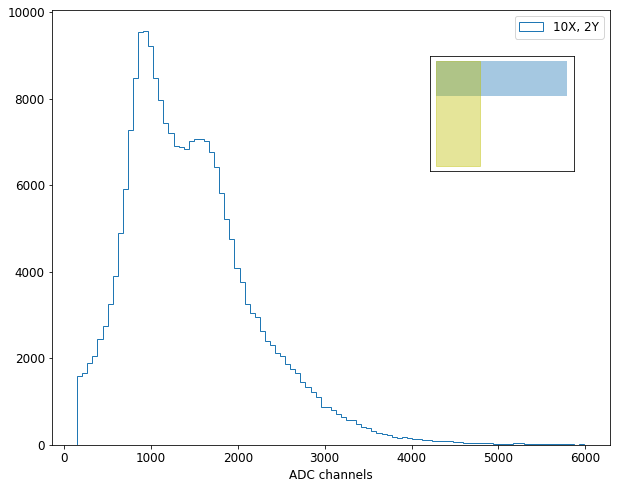

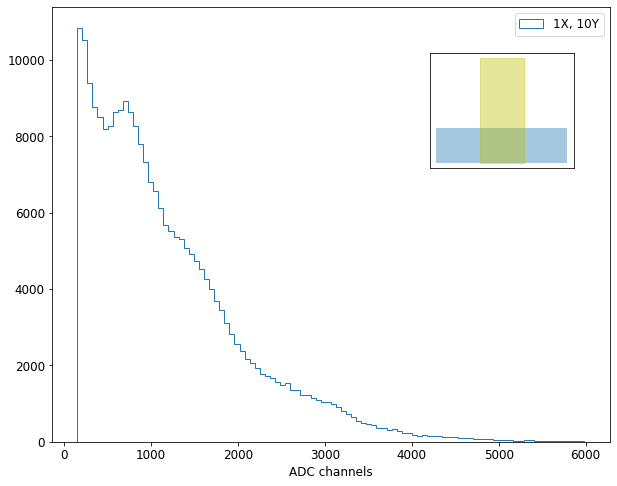

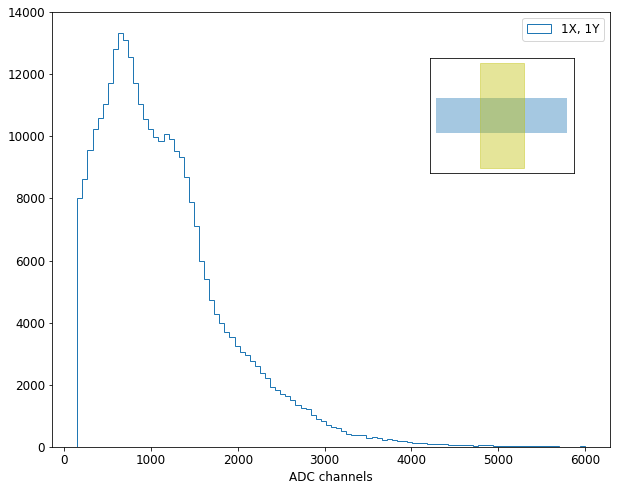

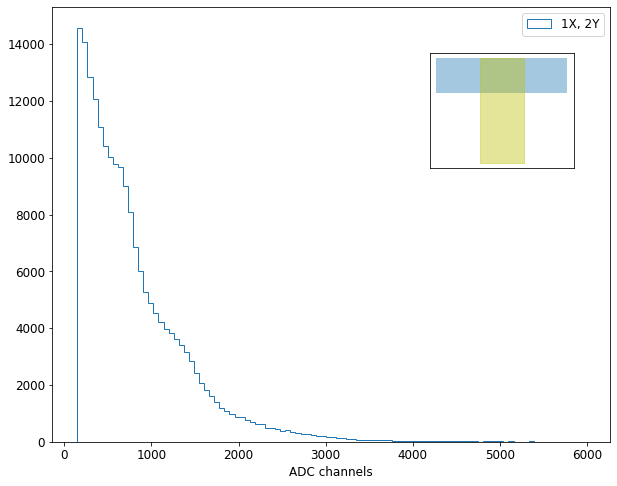

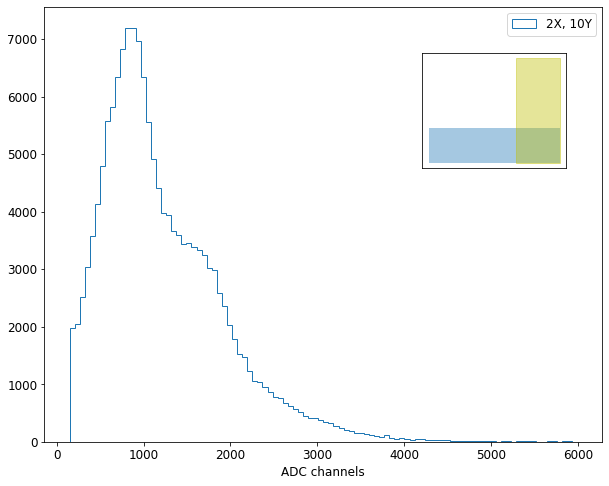

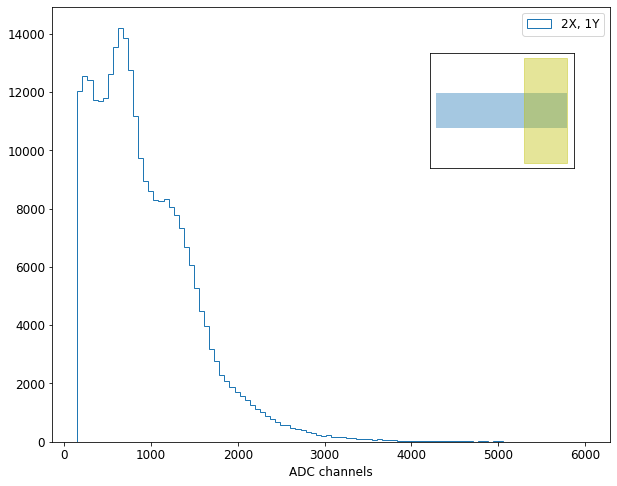

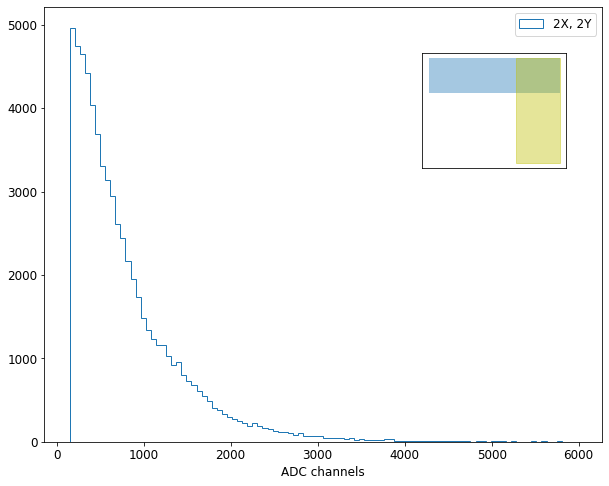

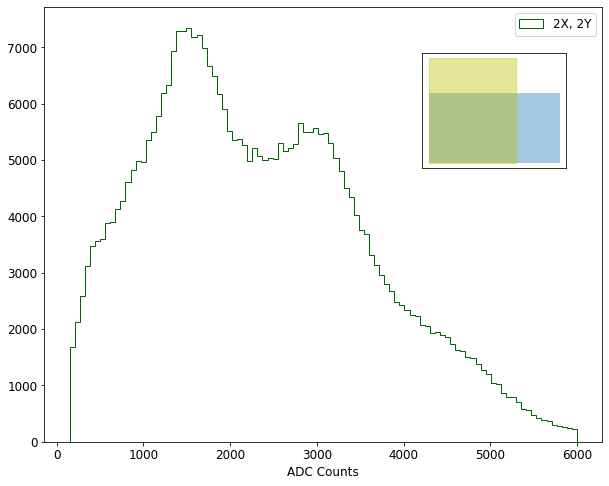

In [7]:
import itertools
for (X,Y),(x,y) in zip(itertools.product(total_spectrum_bundle.keys()[::2],total_spectrum_bundle.keys()[1::2]),\
                   itertools.product(range(3),range(3))):
    square = total_spectrum_bundle['{}'.format(X)] + total_spectrum_bundle['{}'.format(Y)]
    plt.hist(square[square>lower_threshold],bins=100,histtype='step',label='{}, {}'.format(X,Y))
    plt.legend()
    plt.xlabel('ADC channels')
    plt.axes([.65, .6, .2, .2])
    horizontal_band_x = [0,3]
    horizontal_band_y1 = y
    horizontal_band_y2 = y + 1
    vertical_band_x = [x,x + 1]
    vertical_band_y1 = 0
    vertical_band_y2 = 3
    plt.fill_between(horizontal_band_x,horizontal_band_y1,horizontal_band_y2,alpha=0.4)
    plt.fill_between(vertical_band_x,vertical_band_y1,vertical_band_y2,alpha=0.4,color='y')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
big_square = total_spectrum_bundle['10X'] + total_spectrum_bundle['10Y'] +\
            total_spectrum_bundle['1X'] + total_spectrum_bundle['1Y']
plt.hist(big_square[big_square>lower_threshold],bins=100,histtype='step',label='{}, {}'.format(X,Y),color='darkgreen')
plt.legend()
plt.xlabel('ADC Counts')
plt.axes([.65, .6, .2, .2])
horizontal_band_x = [0,3]
horizontal_band_y1 = 0
horizontal_band_y2 = 2
vertical_band_x = [0,2]
vertical_band_y1 = 0
vertical_band_y2 = 3
plt.fill_between(horizontal_band_x,horizontal_band_y1,horizontal_band_y2,alpha=0.4)
plt.fill_between(vertical_band_x,vertical_band_y1,vertical_band_y2,alpha=0.4,color='y')
plt.xticks([])
plt.yticks([])
plt.show()

here I compare the multiplicity and drift time of the events in the whole spectrum with the ones in the first peak and in the second peak. The red histograms represent events with a number of x strips that differ from the number of y strips not more than one 

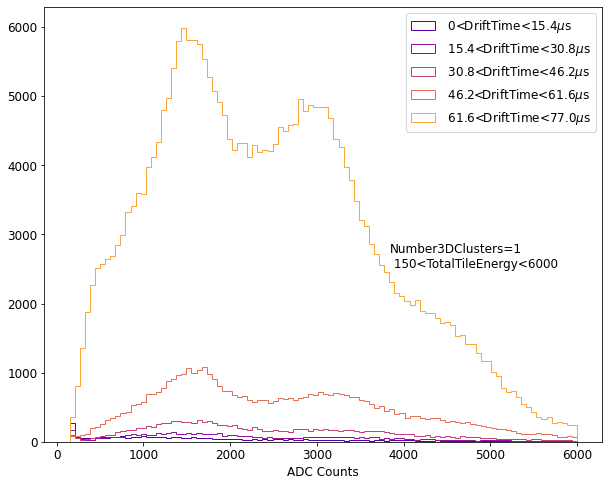

In [8]:
slices = 6
color=cm.plasma(np.linspace(0,0.8,slices))
cut_array = ['TotalTileEnergy>150', 'TotalTileEnergy<6000','Number3DClusters==1']
for i,rg in enumerate(np.linspace(0,77,slices)):
    bins = 100
    if i == 0:
        rg_0 = 0
        continue
    cut_array1 = cut_array[:3] + ['DriftTime>{}'.format(rg_0), 'DriftTime<{}'.format(rg)]
    cut1 = Cut(cut_array1,df,derived_dict)
    mask1 = cut1.mask
    data, bin_edges,_ = plt.hist(df['TotalTileEnergy'].loc[mask1],bins=bins,histtype='step',\
                                 label='{}$\mu$s'.format(cut1.GetString().split(',')[1]),color=color[i])
    rg_0 = rg
    
plt.text(0.62, 0.4,\
         (cut1.GetString().split(',')[0] + '\n' + cut1.GetString().split(',')[-2]), transform = plt.gca().transAxes)
plt.xlabel('ADC Counts')
plt.legend()